In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [436]:
books = pd.read_csv('./data/books_final.csv')
authors = pd.read_csv('./data/author_final.csv')

In [4]:
books.head(5)

,id,title,author_id,url,inception,char_count,text,category,char_type,authorAge,author_role
0,54333,食品の混ぜ物処理および調理の毒物（1820）,1657,https://www.aozora.gr.jp/cards/001657/files/54...,NaN,80156.0,著者フレデリック・アークム専門化学者、ヨーロッパの主な芸術・科学アカデミーおよび学会の会員緒...,NDC 588,新字新仮名,NaN,著者
1,46340,ファラデーの伝,1234,https://www.aozora.gr.jp/cards/001234/files/46...,NaN,76104.0,［＃改丁］序偉人の伝記というと、ナポレオンとかアレキサンドロスとか、グラッドストーンというよ...,NDC 289,新字新仮名,NaN,著者
2,46511,一片の石,1245,https://www.aozora.gr.jp/cards/001245/files/46...,NaN,2975.0,人間が石にたよるやうになつて、もうよほど久しいことであるのに、まだ根気よくそれをやつてゐる。...,NDC 914,新字旧仮名,NaN,著者
3,57975,音楽に就いて,1245,https://www.aozora.gr.jp/cards/001245/files/57...,1922.0,2516.0,既に美育部を持つてゐる早稻田中學校が新に音樂會を興してその發會式をやらうとする其の日から、又...,NDC 914,旧字旧仮名,41.0,著者
4,57976,学規,1245,https://www.aozora.gr.jp/cards/001245/files/57...,NaN,585.0,古い日記や手紙などを、みんな燒いてしまつたので、こまかに時日をいへないが、まだ若い中學教師で...,NDC 914,旧字旧仮名,NaN,著者


In [5]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17370 entries, 0 to 17369
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           17370 non-null  int64  
 1   title        17370 non-null  object 
 2   author_id    17370 non-null  int64  
 3   url          17370 non-null  object 
 4   inception    10639 non-null  float64
 5   char_count   17370 non-null  float64
 6   text         17370 non-null  object 
 7   category     16801 non-null  object 
 8   char_type    17370 non-null  object 
 9   authorAge    10564 non-null  float64
 10  author_role  17370 non-null  object 
dtypes: float64(3), int64(2), object(6)
memory usage: 1.5+ MB


In [6]:
def nulls(df: pd.DataFrame):
    return pd.DataFrame({
        'cols': df.columns,
        "null_count": df.isna().sum().values,
        '% null': np.round(df.isna().sum().values / len(df) * 100, 3)
    }).sort_values(by='null_count', ascending=False).reset_index(drop=True)

In [7]:
nulls(books)

,cols,null_count,% null
0,authorAge,6806,39.182
1,inception,6731,38.751
2,category,569,3.276
3,author_id,0,0.000
4,title,0,0.000
5,id,0,0.000
6,url,0,0.000
7,text,0,0.000
8,char_count,0,0.000
9,char_type,0,0.000


In [8]:
books.describe(include='float')

,inception,char_count,authorAge
count,10639.000000,17370.000000,10564.000000
mean,1932.344487,13456.169315,42.385744
std,20.681545,34426.686869,13.318430
min,712.000000,14.000000,12.000000
25%,1924.000000,1531.250000,32.000000
50%,1933.000000,4314.000000,41.000000
75%,1942.000000,11550.500000,51.000000
max,2022.000000,823518.000000,91.000000


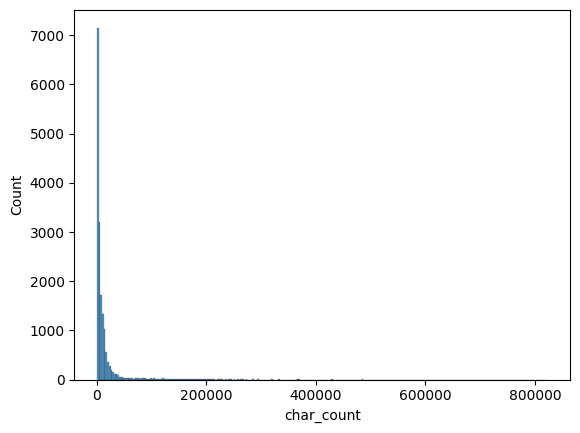

In [11]:
sns.histplot(books['char_count']);

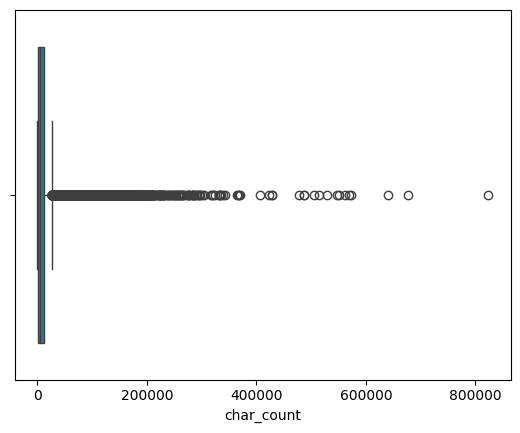

In [12]:
sns.boxplot(books, x='char_count');

There is a lot of variance in terms of `character count`, so I'll split into categories.

Each will hold around 25% of the data:

- `flash`: [0, 1500)
- `shortshort`: [1500, 4000)
- `short`: [400, 12000)
- `novel`: 12000+

In [437]:
num_of_chars = [0, 1500, 4000, 12000, 1000000]
categories = ['flash', 'shortshort', 'short', 'novel']
books['length_type'] = pd.cut(books['char_count'], num_of_chars, labels=categories)

In [18]:
pd.DataFrame(np.unique_counts(books['length_type'])).T

,0,1
0,flash,4268
1,novel,4147
2,short,4897
3,shortshort,4058


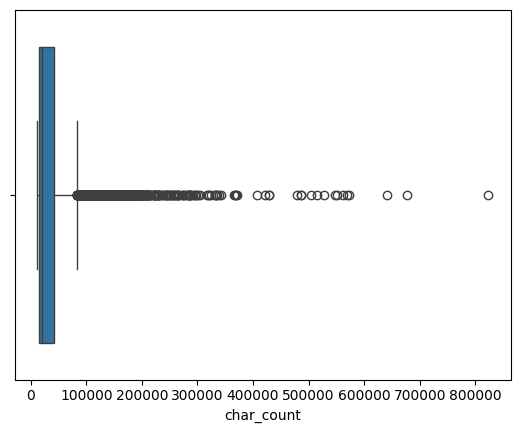

In [23]:
novels = books[books['length_type'] == 'novel']

sns.boxplot(novels, x='char_count');

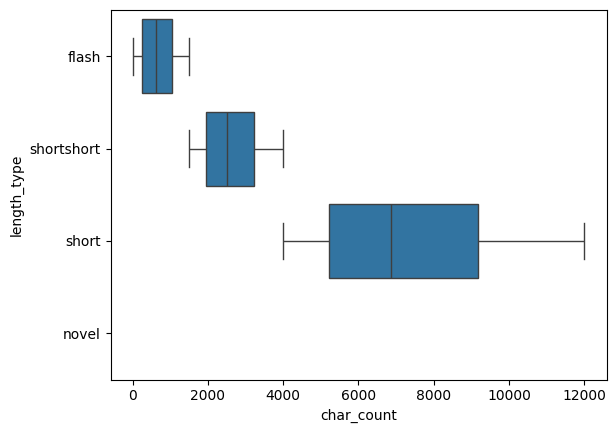

In [22]:
non_novels = books[~(books['length_type'] == 'novel')]

sns.boxplot(non_novels, x='char_count', y='length_type');

I'm going to add another bin between `short` and `novel` so that they have less variance.

In [438]:
num_of_chars = [0, 1500, 4000, 12000, 24000, 1000000]
categories = ['flash', 'shortshort', 'short', 'novelette', 'novel']
books['length_type'] = pd.cut(books['char_count'], num_of_chars, labels=categories)

In [41]:
pd.DataFrame(np.unique_counts(books['length_type'])).T

,0,1
0,flash,4268
1,novel,1791
2,novelette,2356
3,short,4897
4,shortshort,4058


In [439]:
books['length_type'] = pd.qcut(books['char_count'], 5, labels=['flash', 'shortshort', 'short', 'novelette', 'novel'])

In [43]:
pd.DataFrame(np.unique_counts(books['length_type'])).T

,0,1
0,flash,3474
1,novel,3474
2,novelette,3474
3,short,3472
4,shortshort,3476


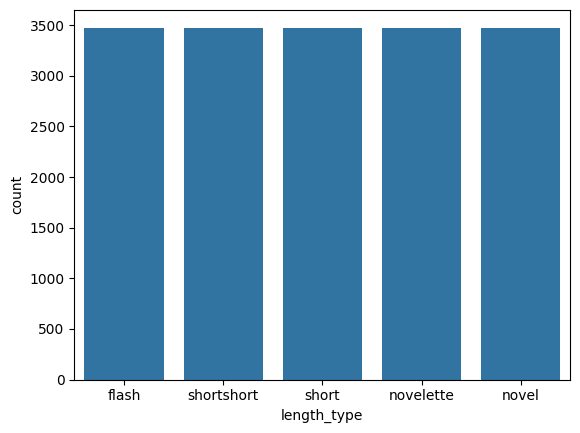

In [55]:
sns.countplot(books, x='length_type');

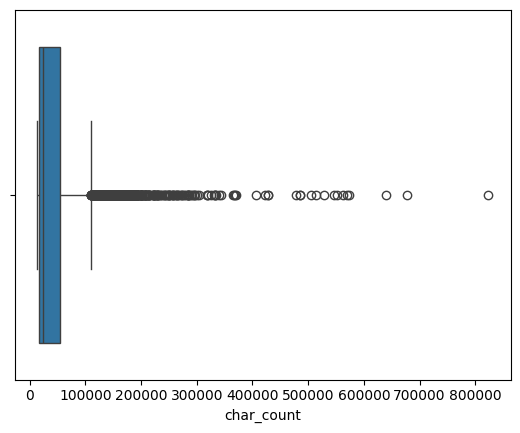

In [44]:
novels = books[books['length_type'] == 'novel']

sns.boxplot(novels, x='char_count');

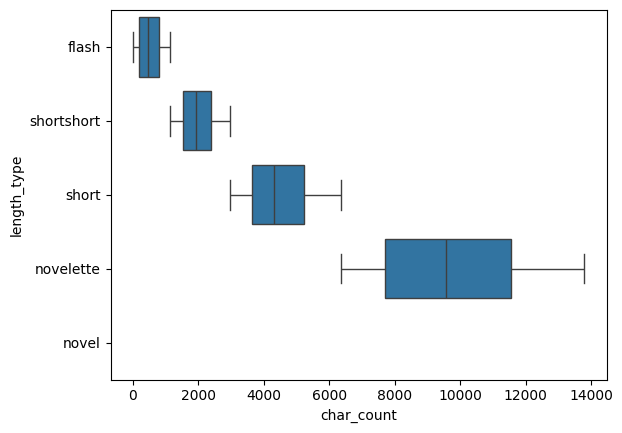

In [45]:
non_novels = books[~(books['length_type'] == 'novel')]

sns.boxplot(non_novels, x='char_count', y='length_type');

In [49]:
d = {}
for type in np.unique_values(books['length_type']):
    d[type] = books[books['length_type'] == type]['char_count'].describe()

pd.DataFrame(d)

,flash,novel,novelette,short,shortshort
count,3474.000000,3474.000000,3474.000000,3472.000000,3476.000000
mean,507.604778,50675.421704,9687.126655,4438.232143,1973.880035
std,341.974140,64346.663773,2172.218763,953.018543,510.660344
min,14.000000,13790.000000,6356.000000,2971.000000,1151.000000
25%,190.000000,17180.500000,7703.500000,3635.000000,1531.750000
50%,451.000000,24713.000000,9555.000000,4314.000000,1928.000000
75%,802.000000,54191.750000,11550.500000,5226.000000,2397.000000
max,1150.000000,823518.000000,13789.000000,6353.000000,2970.000000


Text(0.5, 1.0, 'character count of all non-novels')

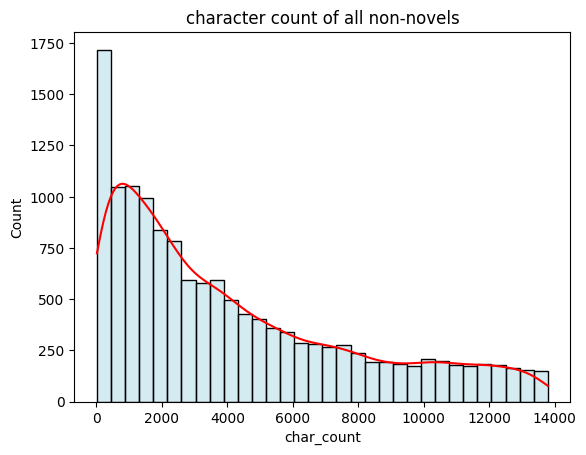

In [ ]:
ax = sns.histplot(non_novels['char_count'], kde=True, color='lightblue');
ax.lines[0].set_color('red');
ax.set_title('character count of all non-novels');

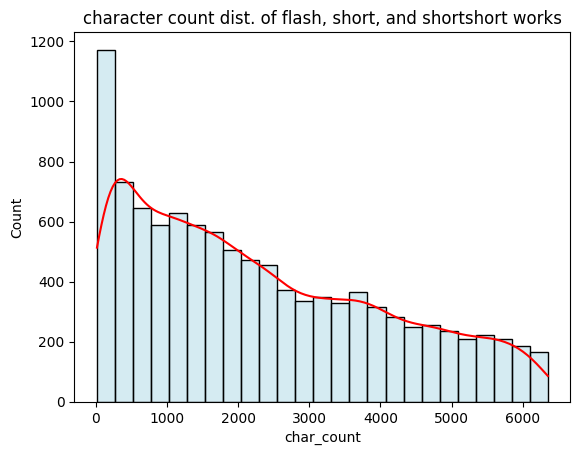

In [58]:
ax = sns.histplot(non_novels[~(non_novels['length_type'] == 'novelette')]['char_count'], kde=True, color='lightblue');
ax.lines[0].set_color('red');
ax.set_title('character count dist. of flash, short, and shortshort works');

Text(0.5, 1.0, 'character count of novels')

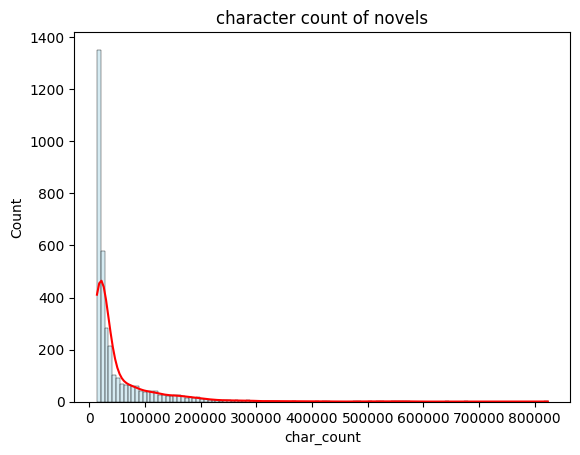

In [ ]:
ax = sns.histplot(novels['char_count'], kde=True, color = 'lightblue');
ax.lines[0].set_color('red');
ax.set_title('character count of novels');

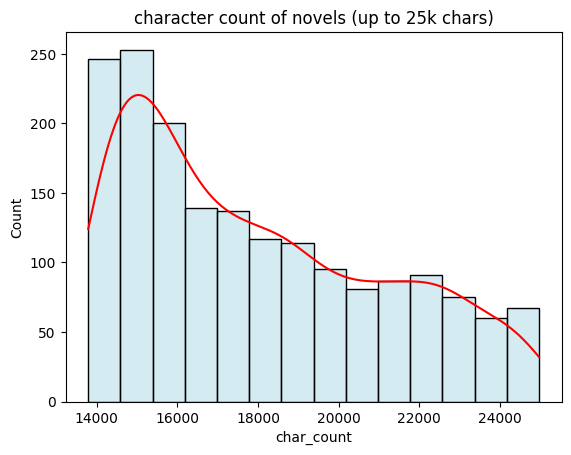

In [61]:
ax = sns.histplot(novels[novels['char_count'] <= 25000]['char_count'], kde=True, color = 'lightblue');
ax.lines[0].set_color('red');
ax.set_title('character count of novels (up to 25k chars)');

As a whole, the dataset seems to have a majority of shorter works (< 10000 chars)

I'm interested to see if this is because a majority of early works are short (maybe due to technological limitations, or perhaps a general lack of literacy to warrant a longer length work).


In [ ]:
count = pd.DataFrame(np.unique_counts(books['inception'].astype(str))).T
count = count[0: 117].rename({1: 'count', 0: 'year'}, axis=1) # slicing to remove the nans

In [77]:
count['year'] = count['year'].astype(float)

In [78]:
count['bins'] = pd.qcut(count['year'], 9)

count

,year,count,bins
0,1331.0,1,"(711.999, 1880.778]"
1,1768.0,1,"(711.999, 1880.778]"
2,1776.0,1,"(711.999, 1880.778]"
3,1854.0,1,"(711.999, 1880.778]"
4,1872.0,2,"(711.999, 1880.778]"
...,...,...,...
112,1997.0,2,"(1980.111, 2022.0]"
113,2016.0,3,"(1980.111, 2022.0]"
114,2019.0,3,"(1980.111, 2022.0]"
115,2022.0,3,"(1980.111, 2022.0]"


In [79]:
counts = pd.DataFrame(count.groupby('bins', as_index=False).sum()[['bins', 'count']]);

counts

C:\Users\Jaden\AppData\Local\Temp\ipykernel_15716\1040286434.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  counts = pd.DataFrame(count.groupby('bins', as_index=False).sum()[['bins', 'count']]);


,bins,count
0,"(711.999, 1880.778]",30
1,"(1880.778, 1894.778]",153
2,"(1894.778, 1907.667]",451
3,"(1907.667, 1920.556]",1339
4,"(1920.556, 1933.444]",3473
5,"(1933.444, 1946.333]",3022
6,"(1946.333, 1959.222]",1892
7,"(1959.222, 1980.111]",164
8,"(1980.111, 2022.0]",115


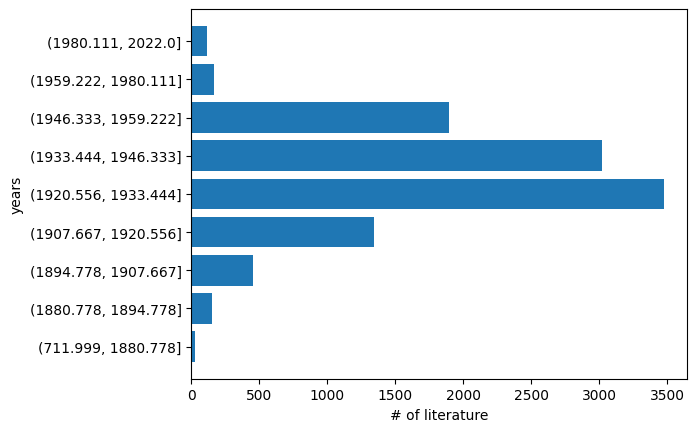

In [80]:
plt.barh(counts.bins.astype(str), counts['count']);
plt.xlabel('# of literature')
plt.ylabel('years')
plt.show()

In [81]:
counts['%_change'] = counts['count'].pct_change() * 100;

C:\Users\Jaden\AppData\Local\Temp\ipykernel_15716\2214901247.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  counts['%_change'] = counts['count'].pct_change() * 100;


In [83]:
counts

,bins,count,%_change
0,"(711.999, 1880.778]",30,NaN
1,"(1880.778, 1894.778]",153,410.000000
2,"(1894.778, 1907.667]",451,194.771242
3,"(1907.667, 1920.556]",1339,196.895787
4,"(1920.556, 1933.444]",3473,159.372666
5,"(1933.444, 1946.333]",3022,-12.985891
6,"(1946.333, 1959.222]",1892,-37.392455
7,"(1959.222, 1980.111]",164,-91.331924
8,"(1980.111, 2022.0]",115,-29.878049


### Categorizing by era:

In [172]:
era_count = count
bins = [0, 1867, 1912, 1926, 1989, 2019]
labels = ['Pre-Meiji', 'Meiji', 'Taisho', 'Showa', 'Heisei']
era_count['bins'] = pd.cut(era_count['year'], bins, labels=labels)

In [173]:
era_count = pd.DataFrame(era_count.groupby('bins', as_index=False).sum()[['bins', 'count']]);

era_count

C:\Users\Jaden\AppData\Local\Temp\ipykernel_15716\3406830745.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  era_count = pd.DataFrame(era_count.groupby('bins', as_index=False).sum()[['bins', 'count']]);


,bins,count
0,Pre-Meiji,0
1,Meiji,1072
2,Taisho,2454
3,Showa,7091
4,Heisei,14


In [282]:
idx = books[books['inception'] < 1867].index

books = books.drop(index=idx)

In [283]:
count = pd.DataFrame(np.unique_counts(books['inception'].astype(str))).T
count = count[0: 112].rename({1: 'count', 0: 'year'}, axis=1)
count['year'] = count['year'].astype(float)
count

,year,count
0,1872.0,2
1,1873.0,1
2,1874.0,6
3,1875.0,5
4,1876.0,3
...,...,...
107,1995.0,1
108,1997.0,2
109,2016.0,3
110,2019.0,3


In [284]:
era_count = count
bins = [1867, 1912, 1926, 1989, 2022]
labels = [ 'Meiji', 'Taisho', 'Showa', 'Heisei']
era_count['bins'] = pd.cut(era_count['year'], bins, labels=labels)

In [177]:
era_count

,year,count,bins
0,1872.0,2,Meiji
1,1873.0,1,Meiji
2,1874.0,6,Meiji
3,1875.0,5,Meiji
4,1876.0,3,Meiji
...,...,...,...
107,1995.0,1,Heisei
108,1997.0,2,Heisei
109,2016.0,3,Heisei
110,2019.0,3,Heisei


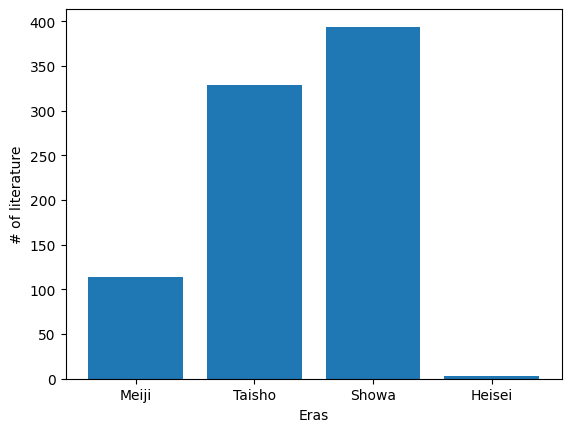

In [285]:
plt.bar(era_count.bins, era_count['count']);
plt.xlabel('Eras');
plt.ylabel('# of literature');
plt.show()

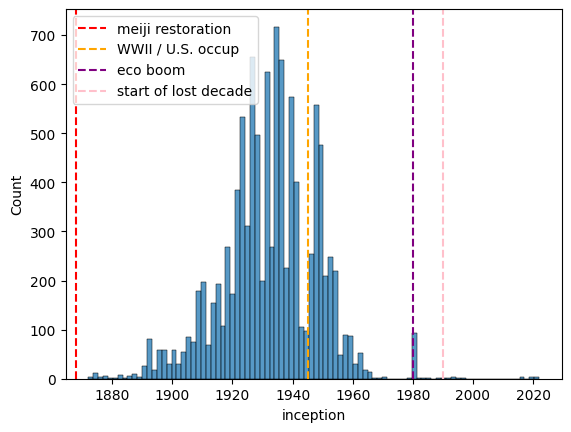

In [179]:
ax = sns.histplot(books['inception']);
meiji_rest = ax.axvline(x=1868, c='red', ls='--')
meiji_rest.set_label('meiji restoration')
WWII = ax.axvline(x=1945, c='orange', ls='--')
WWII.set_label('WWII / U.S. occup')
bubble = ax.axvline(x=1980, c='purple', ls='--')
bubble.set_label('eco boom')
lost = ax.axvline(x=1990, c='pink', ls='--')
lost.set_label('start of lost decade')
ax.legend(loc=2);


In [180]:
def book_count_by_year(book_type):
    df = books[books['length_type'] == book_type]
    ax = sns.histplot(df['inception']);
    meiji_rest = ax.axvline(x=1868, c='red', ls='--')
    meiji_rest.set_label('meiji restoration')
    WWII = ax.axvline(x=1945, c='orange', ls='--')
    WWII.set_label('WWII / U.S. occup')
    ax.legend(loc=2);

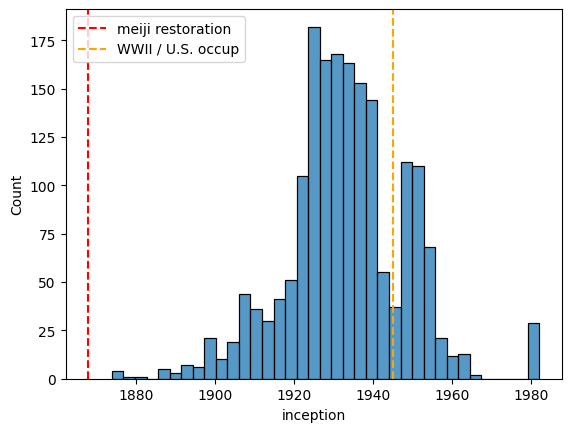

In [181]:
book_count_by_year('flash')

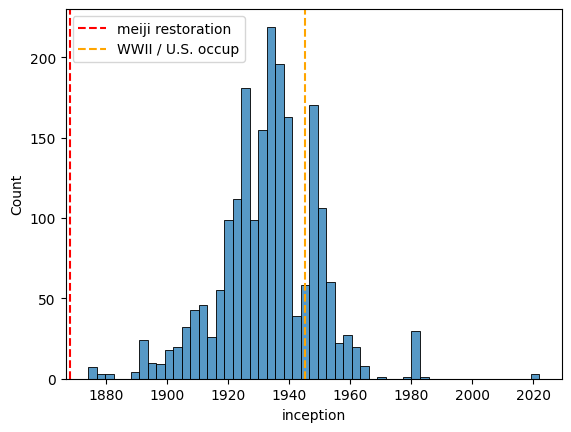

In [182]:
book_count_by_year('shortshort')

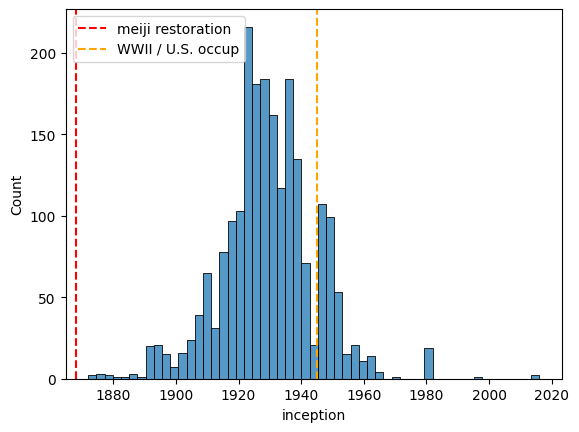

In [183]:
book_count_by_year('short')

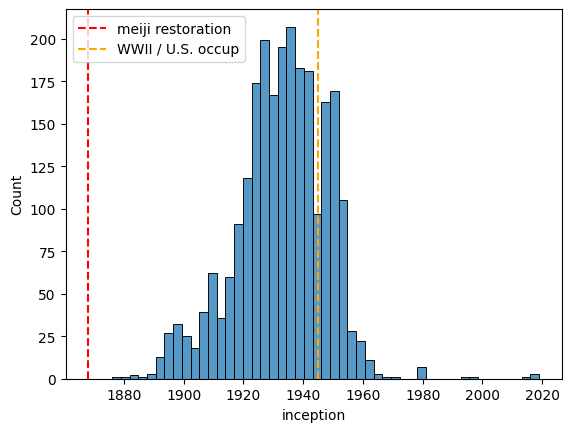

In [184]:
book_count_by_year('novelette')

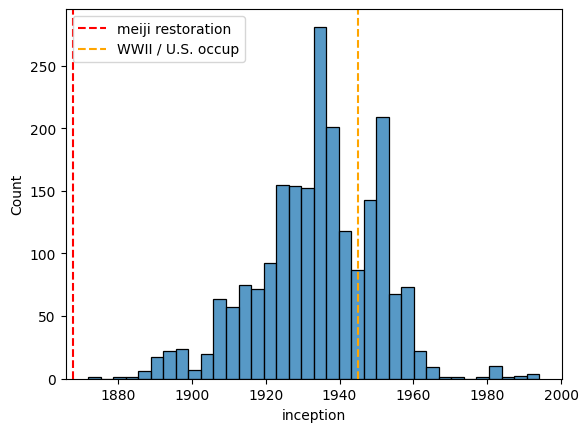

In [185]:
book_count_by_year('novel')

In [186]:
plots = []
for type in np.unique_values(books['length_type'].astype(str)):
    if type != 'nan':
        plots.append(books[books['length_type'] == type]['inception']) 


In [187]:
types = np.unique_values(books['length_type'].astype(str))


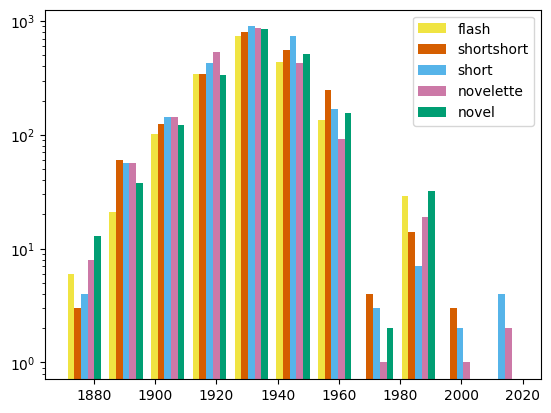

In [200]:
palette_colors = [
    '#F0E442',  # Yellow
    '#D55E00',  # Red-orange
    '#56B4E9',  # Sky blue
    '#CC79A7',  # Pink
    '#009E73',  # Green 
]

bins = np.linspace(1870, 2020,12)
plt.hist(plots, bins=bins, label=['flash', 'shortshort', 'short', 'novelette', 'novel'], log=True, color=palette_colors)
plt.legend(loc='upper right') 
#'flash', 'novel', 'novelette', 'short', 'shortshort'
plt.show()

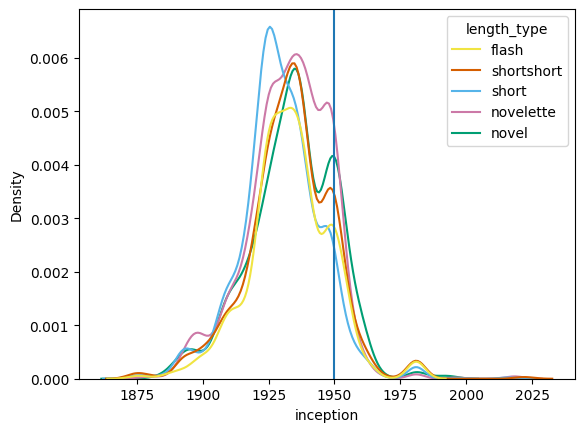

In [203]:
palette_colors = ['#F0E442',  # Yellow
    '#D55E00',  # Red-orange
    '#56B4E9',  # Sky blue
    '#CC79A7',  # Pink
   '#009E73',  # Green 
   ]
ax = sns.kdeplot(books, x = 'inception', hue='length_type', palette=palette_colors);

ax.axvline(1950)

Insights:

- Each book type shares similar trends
  - Drastic increase starting early 1900s, especially after WWI.
  - dip during WWII, with an upsurge following the beginning of U.S. occupation.
  - A very unnatural near-zero count of works during the 1970s.
  - A slight resurge of works during the 1980s.
- `short`s were most prominent between 1920s and 1930, after which it drops the most drastically during WWII, leading to other works becoming more prominent.
- `novelette`s and `novel`s were most prominent between 1935 - 1950, which would align with the Great Depression and WWII. `novelette`'s dip during WWII is much less drastic than the others.
- `shortshort` and `flash`'s distribution seem to be similar to one another, with `shortshort` being clustered around 1930 - 1940.


Limitations:

- As Aozora Bunko is a legal Japanese digital library, it only contains
 1. out-of-copyright books (copyright policy is 70 years after the author's death.)
 2. works that authors wish to make freely available.

- This does explain the drastic decrease starting 1950, (2025 - 70 = 1955) and the absence of works post 1955.
  - What is interesting, however, is the upsurge in works in the 1980s that are present in the library.

##  Taking a peek at the authors.

#### Gender breakdowns

In [425]:
authors.head()

,id,author,birthDate,deathDate,gender,birthPlace,last,first,birthYear,deathYear,first_work_age
0,148.0,夏目漱石,1867-02-09,1916-12-09,male,喜久井町,Natsume,Soseki,1867.0,1916.0,37.0
1,81.0,宮沢賢治,1896-08-27,1933-09-21,male,花巻川口町,Miyazawa,Kenji,1896.0,1933.0,25.0
2,35.0,太宰治,1909-06-19,1948-06-13,male,金木町,Dazai,Osamu,1909.0,1948.0,24.0
3,119.0,中島敦,1909-05-05,1942-12-04,male,四谷区,Nakajima,Atsushi,1909.0,1942.0,24.0
4,96.0,夢野久作,1889-01-04,1936-03-11,male,福岡市,Yumeno,Kyusaku,1889.0,1936.0,30.0


In [426]:
authors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 951 entries, 0 to 950
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              951 non-null    float64
 1   author          951 non-null    object 
 2   birthDate       928 non-null    object 
 3   deathDate       925 non-null    object 
 4   gender          951 non-null    object 
 5   birthPlace      801 non-null    object 
 6   last            951 non-null    object 
 7   first           935 non-null    object 
 8   birthYear       928 non-null    float64
 9   deathYear       925 non-null    float64
 10  first_work_age  611 non-null    float64
dtypes: float64(4), object(7)
memory usage: 81.9+ KB


In [427]:
nulls(authors)

,cols,null_count,% null
0,first_work_age,340,35.752
1,birthPlace,150,15.773
2,deathYear,26,2.734
3,deathDate,26,2.734
4,birthYear,23,2.419
5,birthDate,23,2.419
6,first,16,1.682
7,author,0,0.000
8,id,0,0.000
9,last,0,0.000


In [428]:
authors.describe()

,id,birthYear,deathYear,first_work_age
count,951.000000,928.000000,925.000000,611.000000
mean,1130.383807,1871.177802,1928.160000,36.831424
std,641.934039,116.635408,118.116121,14.516787
min,5.000000,233.000000,297.000000,12.000000
25%,485.500000,1870.750000,1930.000000,25.000000
50%,1245.000000,1885.000000,1944.000000,33.000000
75%,1652.500000,1898.000000,1956.000000,45.000000
max,2402.000000,1986.000000,2016.000000,89.000000


In [429]:
np.unique_values(authors['gender'].astype(str))

array(['female', 'male', 'unknown'], dtype=object)

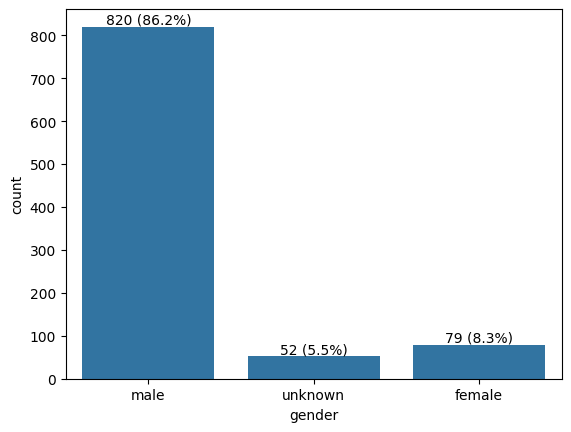

In [410]:
ax = sns.countplot(x=authors['gender'],)
for p in ax.patches:
    height = p.get_height()
    percentage = 100 * height / len(authors)
    ax.text( # to show individual frequencies.
        p.get_x() + p.get_width() / 2.,
        height,                          
        f'{int(height)} ({np.round(percentage,1)}%)',               
        ha='center', va='bottom'         
)

plt.show()

Not many females at all.


In [488]:
female = authors[authors['gender'] == 'female']

female

,author_id,author,birthDate,deathDate,gender,birthPlace,last,first,birthYear,deathYear,first_work_age
27,64.0,樋口一葉,1872-05-02,1896-11-23,female,東京,Higuchi,Ichiyo,1872.0,1896.0,20.0
42,52.0,紫式部,0973-00-00,1014-00-00,female,Heian-kyō,Murasaki Shikibu,NaN,973.0,1014.0,NaN
54,1090.0,オルコットルイーザ・メイ,1832-11-29,1888-03-06,female,Germantown,Alcott,Louisa May,1832.0,1888.0,NaN
65,1176.0,シェリーメアリー・ウォルストンクラフト,1797-08-30,1851-02-01,female,Somers Town,Shelley,Mary Wollstonecraft,1797.0,1851.0,NaN
77,76.0,岡本かの子,1889-03-01,1939-02-18,female,赤坂,Okamoto,Kanoko,1889.0,1939.0,30.0
...,...,...,...,...,...,...,...,...,...,...,...
919,1422.0,戸田豊子,1904-01,1956-04-11,female,Japan,戸田,豊子,1904.0,1956.0,25.0
924,2136.0,ノアイユアンナ・ド,1876-11-15,1933-04-30,female,France,ノアイユ,アンナ・ド,1876.0,1933.0,NaN
930,2402.0,ファイルマンローズ,1877-03-06,1957-08-01,female,United Kingdom,ファイルマン,ローズ,1877.0,1957.0,50.0
933,2085.0,間所紗織,1924-05-24,1966-01-31,female,Aichi,間所,紗織,1924.0,1966.0,NaN


In [ ]:
female_ids = female['author_id']

female_works = books[books['author_id'].isin(female_ids)]

female_works

,id,title,author_id,url,inception,char_count,text,category,char_type,authorAge,author_role,length_type,eras
32,59016,現代作家は古典をどうみるか,1990,https://www.aozora.gr.jp/cards/001990/files/59...,NaN,137.0,〔設問〕一明治以前の日本の伝統美術で最も興味をもっているものは何か二その理由芥川紗織一、土偶...,NDC 723,新字新仮名,NaN,著者,flash,NaN
33,59393,「ぴ・い・ぷ・る」,1990,https://www.aozora.gr.jp/cards/001990/files/59...,1956.0,239.0,民話を描くこの一年の間に随分沢山の日本の民話を読みあさりました。古くから語りつがれて来たおは...,NDC 723,新字新仮名,32.0,著者,flash,Showa
34,59502,美容院にのぞむこと,1990,https://www.aozora.gr.jp/cards/001990/files/59...,NaN,189.0,こと容姿に關しては私は恐ろしく小心なのでとても壯麗な美容院に一人で入つて行く勇氣がありません...,NDC 595,旧字新仮名,NaN,著者,flash,NaN
35,59722,表紙絵について,1990,https://www.aozora.gr.jp/cards/001990/files/59...,NaN,240.0,雑誌の表紙は始めてです。何時もと同じ染色の方法で何時もと同じ人間の描き方をしました。乳房のあ...,NDC 723,新字新仮名,NaN,著者,flash,NaN
36,59022,民芸品の部屋で,1990,https://www.aozora.gr.jp/cards/001990/files/59...,1955.0,543.0,前にタマヨの絵を美術雑誌の原色版で見てそのまか不思議な色彩にひどく惹かれました。それ以来私は...,NDC 723,新字新仮名,31.0,著者,flash,Showa
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17214,2387,梁上の足,331,https://www.aozora.gr.jp/cards/000331/files/23...,NaN,5475.0,梁上の足若杉鳥子晝間、街から持つて來た昂奮が、夜中私を睡らせなかつた。おまけに、腦天を紛碎し...,NDC 913,旧字旧仮名,NaN,著者,short,NaN
17215,2388,烈日,331,https://www.aozora.gr.jp/cards/000331/files/23...,NaN,2118.0,急坂私が坂を下りやうとした時、下の方から急激な怒號が起つた。罵る叫ぶ叱する、呻く力を張る、そ...,NDC 913,旧字旧仮名,NaN,著者,shortshort,NaN
17216,47137,黄金機会,163,https://www.aozora.gr.jp/cards/000163/files/47...,1893.0,14048.0,上私は二十になつた今日までの生涯にこれぞといつて人さまにお話し申す大事件もなく、父母の膝下に...,NDC K913,新字旧仮名,29.0,著者,novel,Meiji
17217,47138,鼻で鱒を釣つた話（実事）,163,https://www.aozora.gr.jp/cards/000163/files/47...,1893.0,2068.0,みなさん、魚はどういふものを食べたがるか、御承知ですか？。蚯蚓に団子………。さ様、それから生...,NDC K913,新字旧仮名,29.0,著者,shortshort,Meiji


<Axes: xlabel='inception', ylabel='Count'>

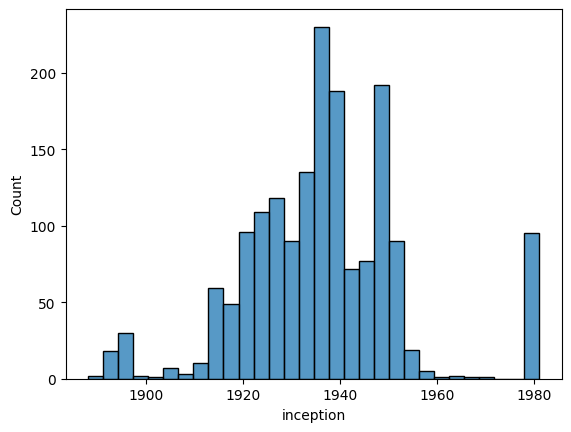

In [491]:
sns.histplot(female_works['inception'])

#### Authors / Era breakdown

In [411]:
count = pd.DataFrame(np.unique_counts(authors['birthYear'].astype(str))).T

count = count[0:138]

count = count.rename(columns={0: 'year', 1: 'count'})
count['year'] = count['year'].astype(float)

In [412]:
count['year'] = count['year'] + 30 # around when most write their first work

In [413]:
era_author_count = count
bins = [1867, 1912, 1926, 1989, 2022]
labels = [ 'Meiji', 'Taisho', 'Showa', 'Heisei']
era_author_count['bins'] = pd.cut(era_author_count['year'], bins, labels=labels)

nulls(era_author_count)

,cols,null_count,% null
0,bins,39,28.261
1,year,0,0.000
2,count,0,0.000


22% of the years are null. This looks deceivingly large, as this only contains unique years of birth. In actuality, 31 / len(authors) = 3% of the authors are outside the years defined.

In [414]:
era_author_count = era_author_count.dropna()

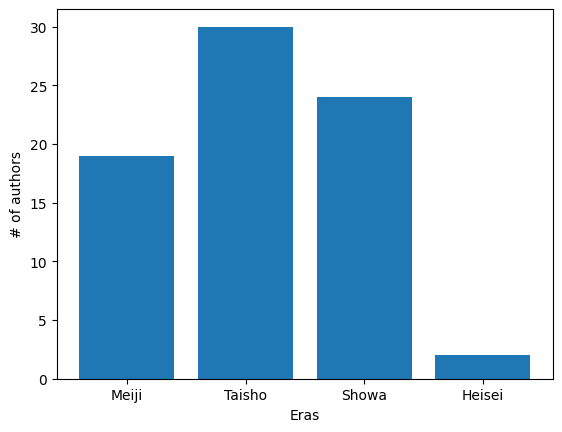

In [415]:
plt.bar(era_author_count.bins, era_author_count['count']);
plt.xlabel('Eras');
plt.ylabel('# of authors');
plt.show()

In [416]:
era_author_count['type'] = 'authors'
era_count['type'] = 'works'

combined = pd.concat([era_author_count, era_count])

C:\Users\Jaden\AppData\Local\Temp\ipykernel_15716\607867148.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  era_author_count['type'] = 'authors'


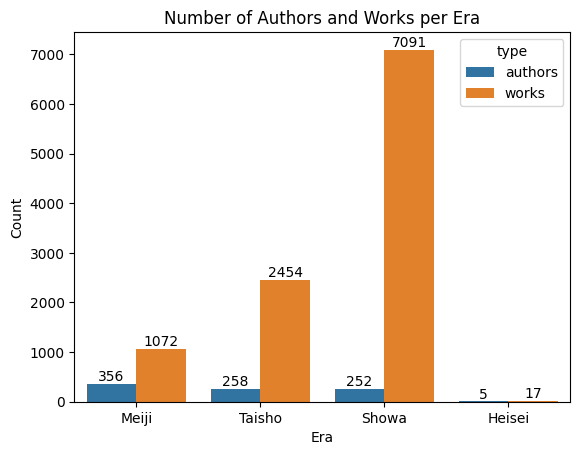

In [417]:
ax = sns.barplot(data=combined, x='bins', y='count', hue='type', errorbar=None,  estimator=np.sum)
plt.xlabel('Era')
plt.ylabel('Count')
plt.title('Number of Authors and Works per Era')
for p in ax.patches:
    height = p.get_height()
    if height > 0:  # Avoid labels for empty bars
        ax.text(
            p.get_x() + p.get_width() / 2.,  # X position (center of bar)
            height,                          # Y position (top of bar)
            f'{int(height)}',                # The count
            ha='center', va='bottom'
        )

plt.show()


Each author is uniquely counted and will only be in one distinct era.

In terms of `number of authors` per era, it should be cumulative as new, young authors join older authors.

In [418]:
eras = {
    'Meiji': (1868, 1912),
    'Taisho': (1912, 1926),
    'Showa': (1926, 1989),
    'Heisei': (1989, 2019)
}

def assign_eras(birth, death):
    if pd.isnull(death):  
        death = birth

    lived_eras = []
    
    for era, (start, end) in eras.items():
        if birth <= end and death >= start:
            lived_eras.append(era)
    
    return lived_eras

In [419]:
eras_author = authors[['birthYear', 'deathYear']]

In [420]:
eras_author['eras_lived'] = eras_author.apply(
    lambda row: assign_eras(row['birthYear'], row['deathYear']), axis=1
)

C:\Users\Jaden\AppData\Local\Temp\ipykernel_15716\399832303.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eras_author['eras_lived'] = eras_author.apply(


In [421]:
exp = eras_author.explode('eras_lived')

era_author_count = pd.DataFrame(exp['eras_lived'].value_counts()).reset_index()

era_author_count = era_author_count.rename(columns={'eras_lived': 'bins'})

era_author_count

,bins,count
0,Meiji,849
1,Taisho,810
2,Showa,748
3,Heisei,2


In [422]:
era_author_count['type'] = 'authors'

combined = pd.concat([era_author_count, era_count])

combined

,bins,count,type,year
0,Meiji,849,authors,NaN
1,Taisho,810,authors,NaN
2,Showa,748,authors,NaN
3,Heisei,2,authors,NaN
0,Meiji,2,works,1872.0
...,...,...,...,...
107,Heisei,1,works,1995.0
108,Heisei,2,works,1997.0
109,Heisei,3,works,2016.0
110,Heisei,3,works,2019.0


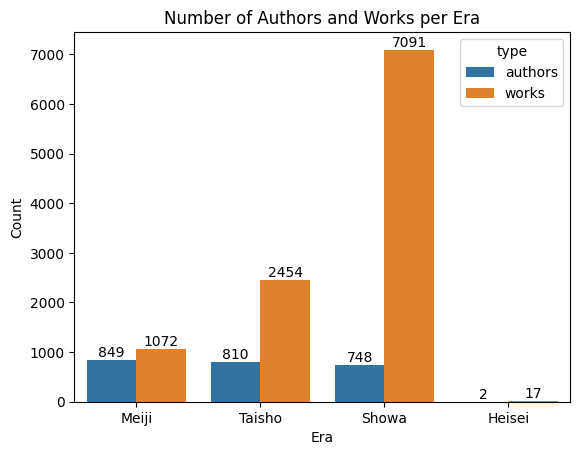

In [423]:
ax = sns.barplot(data=combined, x='bins', y='count', hue='type', errorbar=None,  estimator=np.sum)
plt.xlabel('Era')
plt.ylabel('Count')
plt.title('Number of Authors and Works per Era')
for p in ax.patches:
    height = p.get_height()
    if height > 0:  # Avoid labels for empty bars
        ax.text(
            p.get_x() + p.get_width() / 2.,  # X position (center of bar)
            height,                          # Y position (top of bar)
            f'{int(height)}',                # The count
            ha='center', va='bottom'
        )

plt.show()

Interesting that there are so many works in the Showa period relative to authors.

-  `Meiji` - 1.26 works / author
- `Taisho` - 3.03 works / author
- `Showa` - 9.48 works / author

#### author age

In [424]:
books['authorAge'].describe()

count    10560.000000
mean        42.386648
std         13.320445
min         12.000000
25%         32.000000
50%         41.000000
75%         51.000000
max         91.000000
Name: authorAge, dtype: float64

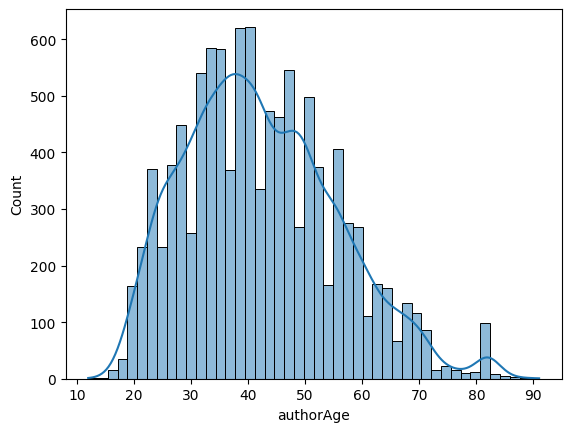

In [431]:
sns.histplot(books['authorAge'], kde=True);

In [441]:
eras = [0, 1867, 1912, 1926, 1989, 2019]
labels = ['Pre-Meiji', 'Meiji', 'Taisho', 'Showa', 'Heisei']

books['eras'] = pd.cut(books['inception'], eras, labels=labels)

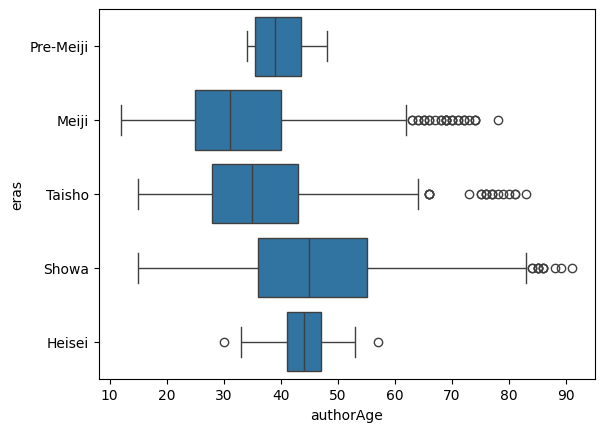

In [443]:
sns.boxplot(books, x='authorAge', y='eras');

In [451]:
authors = authors.rename(columns={'id': 'author_id'})

In [474]:
age_df = books[['author_id','authorAge']]

age_df = age_df.merge(authors[['author_id', 'first_work_age', 'birthYear', 'gender']], how='left', on='author_id')

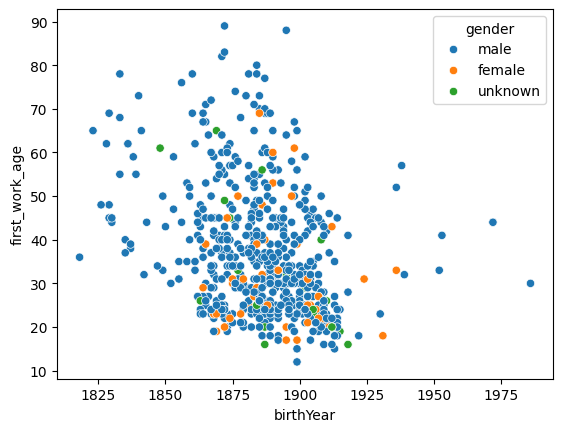

In [468]:
first_age_vs_birthYear = age_df.dropna().drop_duplicates(subset='author_id')


sns.scatterplot(first_age_vs_birthYear[first_age_vs_birthYear['birthYear'] > 1800], x='birthYear', y='first_work_age', hue='gender');

In [486]:
first_age_vs_birthYear.corr(numeric_only=True)

,author_id,authorAge,first_work_age,birthYear
author_id,1.000000,0.202318,0.286191,0.044431
authorAge,0.202318,1.000000,0.829722,-0.219422
first_work_age,0.286191,0.829722,1.000000,-0.231743
birthYear,0.044431,-0.219422,-0.231743,1.000000


In [477]:
authorAge_v_birthYear = age_df.dropna(subset=['authorAge', 'birthYear'])

authorAge_v_birthYear

,author_id,authorAge,first_work_age,birthYear,gender
3,1245,41.0,41.0,1881.0,male
7,1245,43.0,41.0,1881.0,male
8,1245,41.0,41.0,1881.0,male
9,1245,71.0,41.0,1881.0,male
10,1245,67.0,41.0,1881.0,male
...,...,...,...,...,...
17365,1395,46.0,18.0,1889.0,male
17366,1395,63.0,18.0,1889.0,male
17367,1395,32.0,18.0,1889.0,male
17368,1395,18.0,18.0,1889.0,male


In [479]:
mean_author_age = authorAge_v_birthYear.groupby('author_id')['authorAge'].mean().reset_index()

mean_author_age.columns = ['author_id', 'mean_authorAge']

birthYears = authorAge_v_birthYear.groupby('author_id')['birthYear'].first().reset_index()

authorAge_v_birthYear = mean_author_age.merge(birthYears, on ='author_id', how='left')

authorAge_v_birthYear

,author_id,mean_authorAge,birthYear
0,6,37.75,1864.0
1,8,32.50,1903.0
2,11,21.00,1914.0
3,12,21.50,1895.0
4,14,24.00,1896.0
...,...,...,...
606,2214,53.00,1865.0
607,2231,55.00,1839.0
608,2237,46.00,1911.0
609,2238,48.00,1283.0


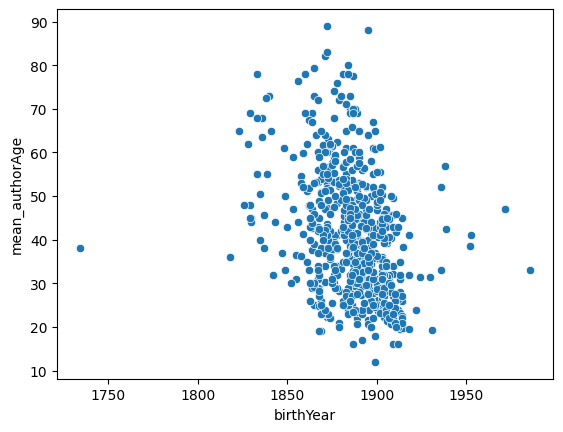

In [482]:
sns.scatterplot(authorAge_v_birthYear[authorAge_v_birthYear['birthYear']> 1700], x='birthYear', y='mean_authorAge');

In [483]:
authorAge_v_birthYear.corr()

,author_id,mean_authorAge,birthYear
author_id,1.000000,0.214639,0.045459
mean_authorAge,0.214639,1.000000,-0.230167
birthYear,0.045459,-0.230167,1.000000


Not much correlation between author age or author age at the time of writing their first work, with birthYear.

#### Clusters